<a href="https://colab.research.google.com/github/fourdozen/fourdozen.github.io/blob/main/galaxy_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Classification of Galaxy Morphology

Astronomers classify galaxies based on their visual appearance and the presence of certain features, and their shape. The most popular classification scheme is the [Hubble Classification Scheme](https://en.wikipedia.org/wiki/Hubble_sequence#/media/File:Hubble_Tuning_Fork_diagram.svg).

There are three broad categories of galaxy: Spirals, Lenticulars and Ellpticals. Also there are irregular galaxies which do not fit into the Hubble Classification Scheme. On a subordinate level, galaxies may or may not features such as spiral arms, bulges, bars. The apperance of a galaxy is also changed by its apparent inclination, varying between being "face-on" and "edge-on".

We aim to classify galaxies based on their broader shape and their finer features.

The dataset used is the Galaxy Zoo Challenge.



### Relevant Papers

1. [Galaxy Zoo 2: detailed morphological classifications for 304 122 galaxies from the Sloan Digital Sky Survey](https://arxiv.org/abs/1308.3496)
2. [Machine and Deep Learning Applied to Galaxy Morphology - A Comparative Study](https://arxiv.org/abs/1901.07047#:~:text=In%20all%20of%20our%20samples,art%20morphological%20classification%20from%20literature.)
3. [A CATALOG OF DETAILED VISUAL MORPHOLOGICAL CLASSIFICATIONS FOR 14,034 GALAXIES IN THE SLOAN DIGITAL SKY SURVEY](https://iopscience.iop.org/article/10.1088/0067-0049/186/2/427#artAbst)
4. [Morphological classification of galaxies with deep learning: comparing 3-way and 4-way CNNs](https://arxiv.org/pdf/2106.01571.pdf)
5. [Galaxy Zoo: reproducing galaxy morphologies via machine learning](https://watermark.silverchair.com/mnras0406-0342.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAA2YwggNiBgkqhkiG9w0BBwagggNTMIIDTwIBADCCA0gGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMptErBk7B898VUvBkAgEQgIIDGePzohyAdS54Ee9cavgr6keVq1C4p7KdsS3HfNytS6S1sSUYwA7nmKp2d4rC0uKiEisJPddueN9w4LHDtQy1zjKD0Ipvca-_vuo3Gjbt5Va9Tdl_tdAnej454G_MYNpiQmAgiWN-P4TcqWoMf2XZv-XVOXMyJr76XFqHHPX766Tj7uaqu4zTK1iC8ajaYfu8_haWlk0jngHz4syemxropq0NLgun8xt4FVcdAdPPJzojr0xRk_mYewUxw8MzqSn_6PiwAshfzZZcqaXppvJix-6Vfqyya-HBI4BEP1sX_qcPECVlJGoRU714OGnoLL0KWyk9h4axSY_S_LxKgyGyhC-7jWmYGCVAcIY4ogBZhkvlTOGtuGXUrqazMV6jLwg7ooNQKzD4f76WrdHooggTCldpII7epqx9HZuWhtbvHg7XXp9LrMkVsyNA0PbRLVw7SBwJ4IMYpeG1x-AM94e0-4AhdyUD2sxrsRG2PXEWvoJbbmz7aEIZ-8a2Bu5tHgO31v3Lc2Bx2GHriDDP535AebRS2TTujeES9NXeYgGvEXweR1UmocCVho4B2Y2iW-6rAKcKq5tikKSpLdXeph5iQl_qeqMV5T3b2aLBvpQdwwBE7-dCh8GfLBNKJO0UYJ5QSMtTEPSqdu3KGaNX4veEFVGDz_z4BSvqsW78S45h5_NPhEwhoDSeisyHue1HDHe25x47S0RXiofNZtGRSptFcRU1r9DbdPfWLmyd4IU7exWlLy6NOP9Hdq66KpADpeO744Oez2Xb5XZaK3q4oot3Cr1mkUho8OS386JYp3uTp3GWiTnUYkMy3IV1_0z4GlNpdXxaU2GqU-BXJPm1xeW4jky8NVyn8PvoPPEE4Rx0O0Ywci6G-Hu-8-M3ozn8G7gBmaMOeT2Bhyv81FkJymJvNIqdzKqTpF0xmcKiRFVkwOVFtdDSPLHEfgwj1flInWgxRcFkM7u6PUCvoriWthVnlZsaW_F2TcDXg2m3oCyCiqNqYN4e2DrD1w8XFERa9GBNz9IAFLb3MbB7ynn3TAsdz_WKC75knusZRSI)
6. [Galaxy Classification Using Transfer Learning and Ensemble of CNNs With Multiple Colour Spaces](https://arxiv.org/pdf/2305.00002.pdf)
7. [Rotation-invariant convolutional neural networks for galaxy morphology prediction](https://academic.oup.com/mnras/article/450/2/1441/979677#16977233)

### Import Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

### Galaxy Zoo 2 Dataset

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fourdozen","key":"d95701b4f4481237eb241e1bf7747208"}'}

In [ ]:
# !pip install kaggle -U

In [4]:
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download robertmifsud/resized-reduced-gz2-images -q
!unzip -q resized-reduced-gz2-images.zip


In [6]:
df = pd.read_csv('3class_map_a(p).csv')
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head(10)

,dr7objid,asset_id,gz2class,total_classifications,total_votes,agreement
0,587732591714893851,58957,Sc+t,45,342,1.000000
1,588009368545984617,193641,Sb+t,42,332,1.000000
2,587732484359913515,55934,Ei,36,125,0.384527
3,587741723357282317,158501,Sc+t,28,218,0.766954
4,587738410866966577,110939,Er,43,151,0.399222
5,587729751132209314,249897,Ei,48,154,0.532355
6,587733608555216981,71801,Ei,39,142,0.235888
7,587735742617616406,87614,Sb+t,35,282,1.000000
8,587738574068908121,113304,Ei,50,158,0.503446
9,587731870708596837,47197,Sb?t,43,275,0.071405


In [7]:
def read_data(agreement_threshold = 0.5):
    df = pd.read_csv('3class_map_a(p).csv')
    df.drop(["Unnamed: 0", "total_classifications", "total_votes"], axis=1, inplace=True)
    return df[df["agreement"] > agreement_threshold]

In [8]:
import os

In [9]:
IMAGES_PATH = '/content/images_E_S_SB_299x299_a_03/images_E_S_SB_299x299_a_03_train'

In [10]:
def create_class_dataframe(folder_path):
    folders = [f for f in os.listdir(folder_path)]
    images = []
    paths = []
    classes = []
    for cat in folders:
        for image in os.listdir(os.path.join(folder_path, cat)):
            image_path = os.path.join(folder_path, cat, image)
            if os.path.isfile(image_path):
                images.append(image.replace('.jpg', ''))
                paths.append(image_path)
                classes.append(cat)
    classes_dict = {"Image": images, "Path": paths,"Class": classes}
    return pd.DataFrame.from_dict(classes_dict)

In [11]:
df = create_class_dataframe(IMAGES_PATH)
df = df.sample(frac=1).reset_index(drop=True) # shuffle rows
df.count()

Image    120432
Path     120432
Class    120432
dtype: int64

In [12]:
df.head(10)

,Image,Path,Class
0,278420,/content/images_E_S_SB_299x299_a_03/images_E_S...,E
1,99553,/content/images_E_S_SB_299x299_a_03/images_E_S...,E
2,249642,/content/images_E_S_SB_299x299_a_03/images_E_S...,SB
3,114600,/content/images_E_S_SB_299x299_a_03/images_E_S...,E
4,222117,/content/images_E_S_SB_299x299_a_03/images_E_S...,E
5,256925,/content/images_E_S_SB_299x299_a_03/images_E_S...,E
6,1055,/content/images_E_S_SB_299x299_a_03/images_E_S...,E
7,1278,/content/images_E_S_SB_299x299_a_03/images_E_S...,E
8,253291,/content/images_E_S_SB_299x299_a_03/images_E_S...,E
9,110177,/content/images_E_S_SB_299x299_a_03/images_E_S...,E


In [13]:
df['Image'].nunique()

120432

Note that all image file naems are unique. We have 120432 images.

### Data Exploaration

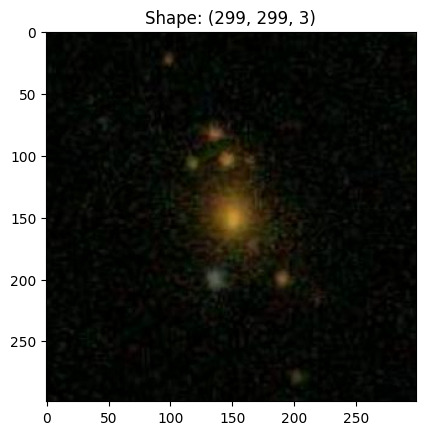

In [14]:
first_image_path = df.iloc[0]["Path"]
sample_image = tf.io.read_file(first_image_path)
sample_image = tf.io.decode_image(sample_image)
plt.imshow(sample_image)
IMG_SHAPE = np.shape(sample_image)
plt.title(f'Shape: {IMG_SHAPE}')
plt.show()

In [15]:
def get_image(full_path):
    image = tf.io.read_file(full_path)
    image = tf.io.decode_image(image)
    return image

In [16]:
def display_galaxy(filename):
    sample_image = get_image(filename)
    plt.imshow(sample_image)
    plt.title(f'Shape: {np.shape(sample_image)}')
    plt.show()


In [17]:
row = df[df['Path'] == '/content/images_E_S_SB_299x299_a_03/images_E_S_SB_299x299_a_03_train/E/214055.jpg']
row = row.values[0]
row[2]

'E'

In [18]:
import random
import math

In [19]:
def display_random_galaxies(df, seed, n=10):
    random.seed(seed)
    training_images = list(df["Path"])
    random_images = random.sample(training_images, n)
    grid_size = (math.ceil(n/5), 5)
    fig, axs = plt.subplots(grid_size[0], grid_size[1], figsize=(20, grid_size[0]*4))
    axs = np.array(axs).flatten()
    for i, ax in enumerate(axs):
        img = get_image(random_images[i])
        ax.imshow(img)
        row = df[df['Path'] == random_images[i]]
        row = row.values[0]
        ax.set_title(f"Title: {row[0]}, Class: {row[2]}")
    plt.show()


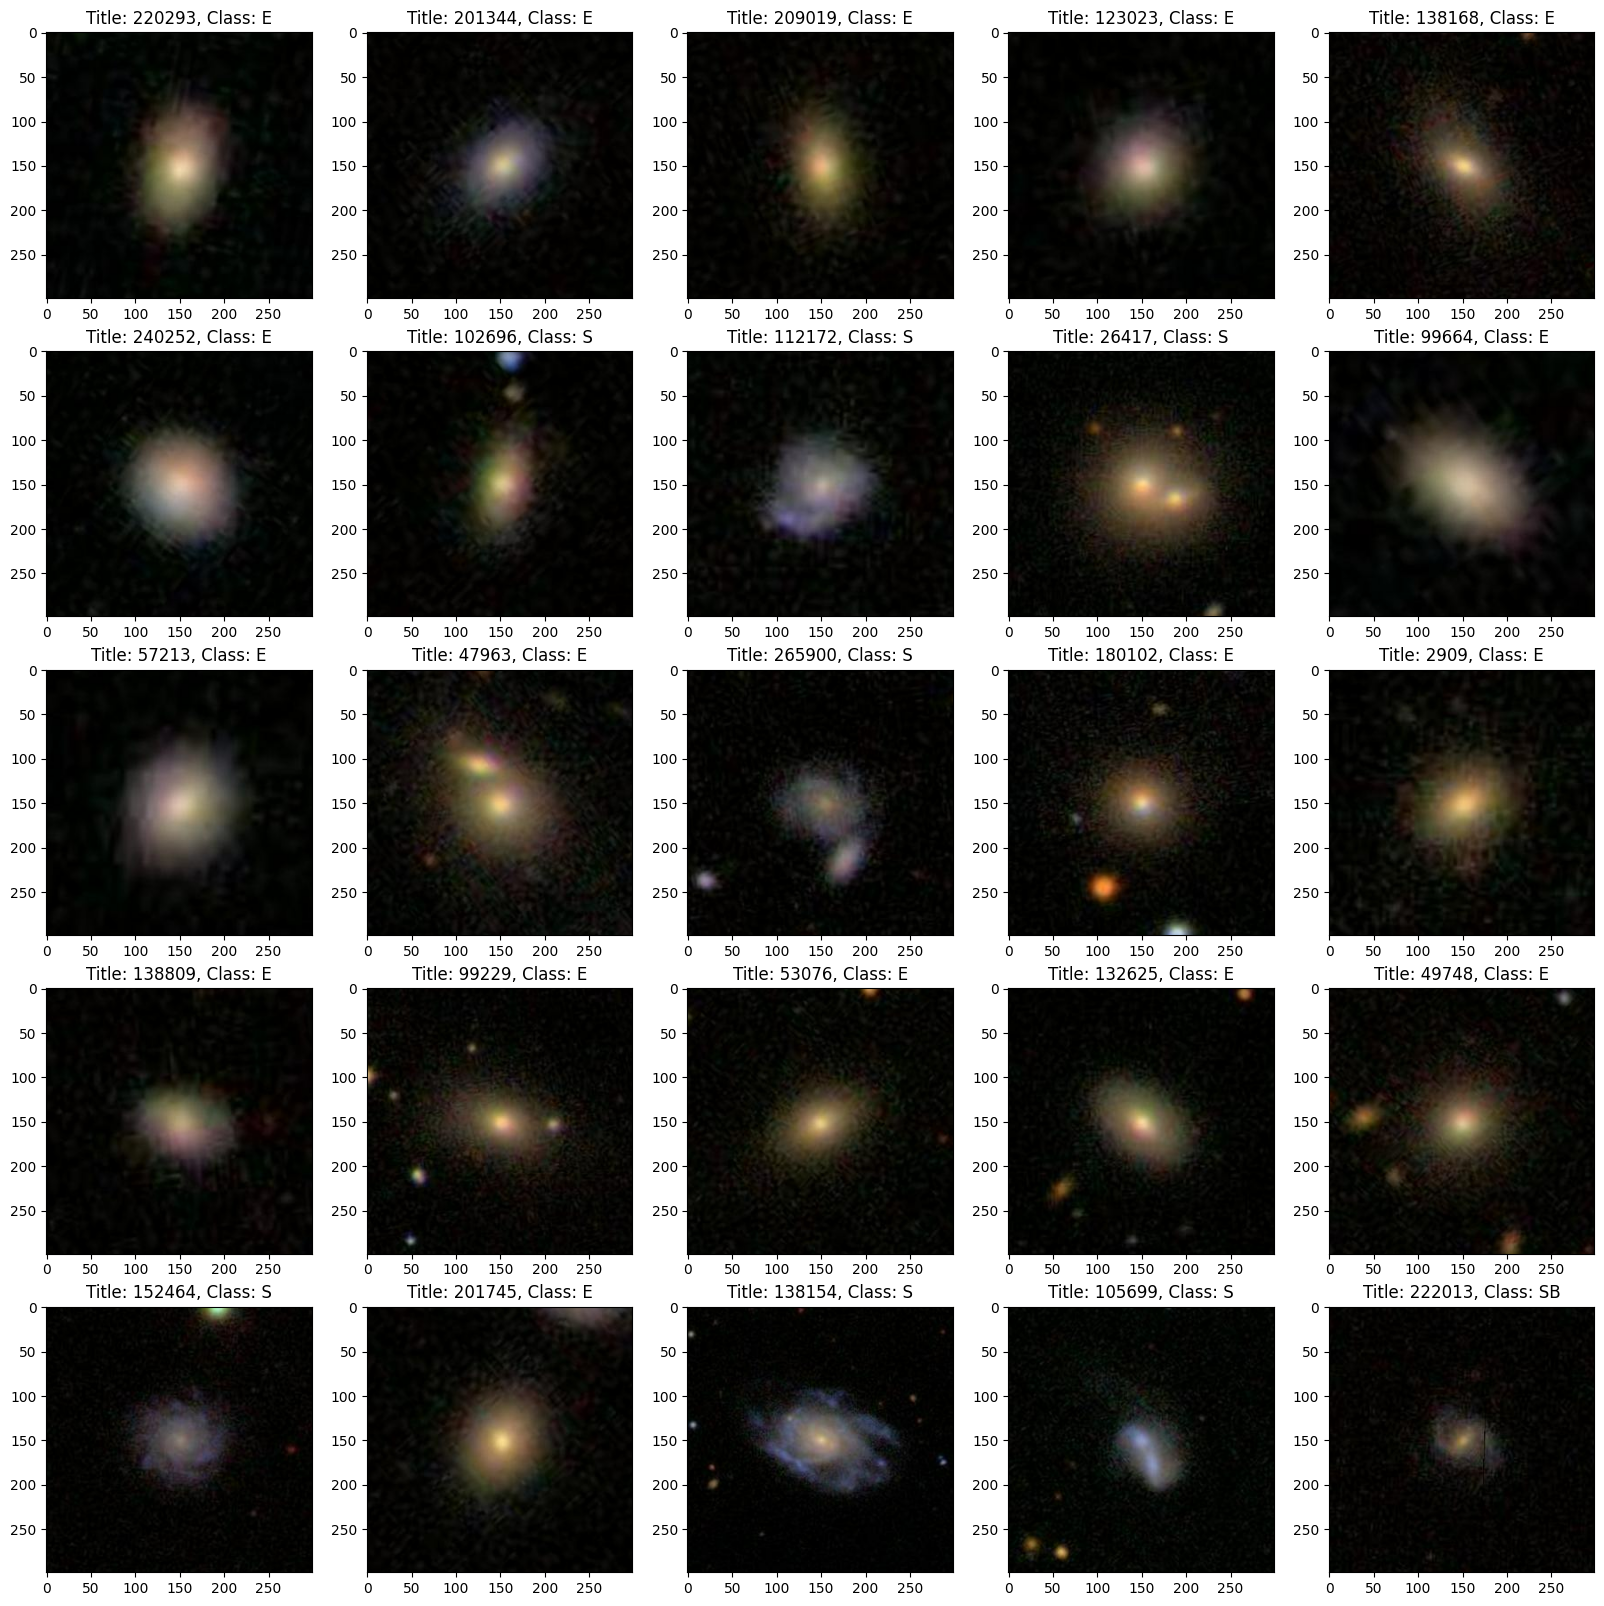

In [20]:
display_random_galaxies(df, 6, 25)

We want One-hot-encode the classes in the dataset.

In [21]:
df_unencoded = df
df = pd.get_dummies(df_unencoded, columns=['Class'])
df.head(10)

,Image,Path,Class_E,Class_S,Class_SB
0,278420,/content/images_E_S_SB_299x299_a_03/images_E_S...,1,0,0
1,99553,/content/images_E_S_SB_299x299_a_03/images_E_S...,1,0,0
2,249642,/content/images_E_S_SB_299x299_a_03/images_E_S...,0,0,1
3,114600,/content/images_E_S_SB_299x299_a_03/images_E_S...,1,0,0
4,222117,/content/images_E_S_SB_299x299_a_03/images_E_S...,1,0,0
5,256925,/content/images_E_S_SB_299x299_a_03/images_E_S...,1,0,0
6,1055,/content/images_E_S_SB_299x299_a_03/images_E_S...,1,0,0
7,1278,/content/images_E_S_SB_299x299_a_03/images_E_S...,1,0,0
8,253291,/content/images_E_S_SB_299x299_a_03/images_E_S...,1,0,0
9,110177,/content/images_E_S_SB_299x299_a_03/images_E_S...,1,0,0


How many images are there in the dataset?


In [22]:
class_totals = df[['Class_E', 'Class_S', 'Class_SB']].sum()
class_totals

Class_E     81547
Class_S     29908
Class_SB     8977
dtype: int64

In total we have:

In [23]:
class_totals.sum()

120432

In [24]:
num_classes = len(df.drop(['Image', 'Path'], axis = 1, inplace = False).columns)
num_classes

3

### Create Dataset

In [133]:
def load_image(file_name):
    raw = tf.io.read_file(file_name)
    tensor = tf.io.decode_image(raw)
    tensor = tf.cast(tensor, tf.float32)
    tensor = tf.reshape(tensor, (299, 299, 3))
    return tensor

def create_dataset(file_names, labels):
    dataset = tf.data.Dataset.from_tensor_slices((file_names, labels))
    dataset = dataset.map(lambda file_name, label: (load_image(file_name), tf.convert_to_tensor(label)))
    return dataset

Split training images into training and validation datasets. This is done at this stage by creating two separate datasets.

We use 85:15 ratio for test:validation data:

In [124]:
file_paths = df['Path'].to_numpy()
labels = df[['Class_E','Class_S','Class_SB']].to_numpy()
train_split = 0.85

In [125]:
from sklearn.model_selection import train_test_split

train_paths, val_paths, train_labels, val_labels = train_test_split(file_paths, labels, train_size=train_split)

In [130]:
train_set = create_dataset(train_paths, train_labels)
val_set = create_dataset(val_paths, val_labels)

In [131]:
print(next(iter(val_set)))

(<tf.Tensor: shape=(299, 299, 3), dtype=uint8, numpy=
array([[[11, 12,  7],
        [13, 14,  9],
        [14, 15, 10],
        ...,
        [ 4,  9,  3],
        [ 4,  9,  3],
        [ 3,  8,  2]],

       [[10, 11,  6],
        [11, 12,  7],
        [13, 14,  9],
        ...,
        [ 4,  9,  3],
        [ 4,  9,  3],
        [ 4,  9,  3]],

       [[ 9, 10,  5],
        [10, 11,  6],
        [11, 12,  7],
        ...,
        [ 5, 10,  4],
        [ 5, 10,  4],
        [ 5, 10,  4]],

       ...,

       [[ 0,  0,  0],
        [ 1,  1,  0],
        [ 2,  2,  0],
        ...,
        [10, 10,  8],
        [ 8,  8,  6],
        [ 5,  5,  3]],

       [[ 0,  0,  0],
        [ 1,  1,  0],
        [ 2,  2,  0],
        ...,
        [10, 10,  8],
        [ 8,  8,  6],
        [ 5,  5,  3]],

       [[ 0,  0,  0],
        [ 1,  1,  0],
        [ 2,  2,  0],
        ...,
        [10, 10,  8],
        [ 8,  8,  6],
        [ 5,  5,  3]]], dtype=uint8)>, <tf.Tensor: shape=(3,), dtype=uint8,

In [116]:
tf.shape(load_image(first_image_path))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([299, 299,   3], dtype=int32)>

### Data Augmentation

We want to perform some data augmentation, to artificially increase the size of our dataset and reduce overfitting.

The following data augmentation steps are taken:

Stage 1:
1. Centre crop from 299 pixel square to 207 pixels to remove excess space around the image.
2. Downscale to 69x69 pixels.
3. Rescale the data from [0, 255] to [0, 1].

Stage 2:
1. Random Traslation by between up, down, left, right or none by a random number of pixels. Yields 5 images.
2. Random Scaling between 1.3 and 1/1.3
3. Random Rotation by (0, 90, 180, 270) degrees.
4. Flipping along y=x. Yields 2 images.

In [99]:
from tensorflow.keras import layers

In [100]:
transf_1 = 207
transf_2 = 69

In [101]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomTranslation(0.2, 0.2, fill_mode="constant", fill_value = 0),
    layers.RandomRotation(0.25, fill_mode="constant", fill_value = 0),
    layers.CenterCrop(transf_1, transf_1),
    layers.Resizing(transf_2, transf_2),
    layers.Rescaling(1./255)
])

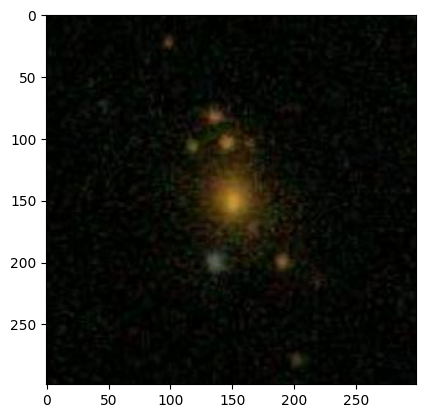

In [102]:
plt.imshow(sample_image)

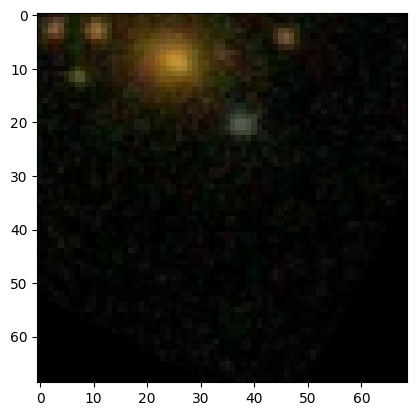

In [103]:
result = data_augmentation(sample_image)
plt.imshow(result)

In [104]:
tf.shape(result)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([69, 69,  3], dtype=int32)>

### Model creation

### Create validation data

validation:training split is 0.15:0.85

In [134]:
model = tf.keras.models.Sequential([
    layers.RandomRotation(0.25, fill_mode="constant", fill_value = 0, input_shape=(299,299,3)),
    layers.CenterCrop(transf_1, transf_1),
    layers.Resizing(transf_2, transf_2),
    layers.Rescaling(1./255),
    layers.Conv2D(32, 7,  padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 5, padding='same', activation='relu'),
    layers.Conv2D(64, 5, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),
])

In [138]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [135]:
for layer in model.layers:
    print(layer.output_shape)

(None, 299, 299, 3)
(None, 207, 207, 3)
(None, 69, 69, 3)
(None, 69, 69, 3)
(None, 69, 69, 32)
(None, 34, 34, 32)
(None, 34, 34, 64)
(None, 34, 34, 64)
(None, 17, 17, 64)
(None, 17, 17, 128)
(None, 8, 8, 128)
(None, 8192)
(None, 8192)
(None, 256)
(None, 256)
(None, 3)


In [136]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation_9 (RandomR  (None, 299, 299, 3)       0         
 otation)                                                        
                                                                 
 center_crop_9 (CenterCrop)  (None, 207, 207, 3)       0         
                                                                 
 resizing_9 (Resizing)       (None, 69, 69, 3)         0         
                                                                 
 rescaling_9 (Rescaling)     (None, 69, 69, 3)         0         
                                                                 
 conv2d_24 (Conv2D)          (None, 69, 69, 32)        4736      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 34, 34, 32)        0         
 ng2D)                                                

In [141]:
batch_size = 512

In [110]:
tf.debugging.disable_traceback_filtering()

In [143]:
model.fit(train_set.batch(batch_size), epochs=100, verbose=1, validation_data = val_set.batch(batch_size))

Epoch 1/100
200/200 [==============================] - 13s 63ms/step - loss: 0.4342 - accuracy: 0.8367 - val_loss: 0.3751 - val_accuracy: 0.8531
Epoch 2/100
200/200 [==============================] - 13s 63ms/step - loss: 0.4240 - accuracy: 0.8412 - val_loss: 0.3587 - val_accuracy: 0.8750
Epoch 3/100
200/200 [==============================] - 13s 63ms/step - loss: 0.4189 - accuracy: 0.8428 - val_loss: 0.3603 - val_accuracy: 0.8594
Epoch 4/100
200/200 [==============================] - 13s 63ms/step - loss: 0.4166 - accuracy: 0.8441 - val_loss: 0.3592 - val_accuracy: 0.8687
Epoch 5/100
200/200 [==============================] - 13s 63ms/step - loss: 0.4120 - accuracy: 0.8463 - val_loss: 0.3671 - val_accuracy: 0.8656
Epoch 6/100
200/200 [==============================] - 13s 64ms/step - loss: 0.4096 - accuracy: 0.8473 - val_loss: 0.3669 - val_accuracy: 0.8687
Epoch 7/100
200/200 [==============================] - 13s 63ms/step - loss: 0.4074 - accuracy: 0.8464 - val_loss: 0.3562 - val_ac

In [144]:
model.save_weights('/content/model/')